# Exploratory Analysis of the Titanic Dataset

In [139]:
# -- impostazione dei titoli --
# # Main title
# ## Analysis Steps
# ### Title
# #### Important text
# Text

The sinking of the Titanic is one of the most famous shipwrecks in history. On April 15, 1912, during its maiden voyage, the Titanic sank after colliding with an iceberg, causing the death of 1502 of the 2224 passengers and crew members. The construction of the Titanic cost about 7.5 million dollars, and it sank into the ocean due to the collision.

Dataset: Titanic - Kaggle

### Objective
The goal is to create a notebook for conducting an exploratory data analysis to determine if the survivors were simply lucky or if some individuals had a higher chance of surviving based on their characteristics.

For this project, we will use the pandas library for data manipulation and matplotlib for data visualization.

---

## 1. Importing the Dataset

Importo delle librerie necessarie per l'analisi dei dati.

In [124]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

Importo da csv in dataframe. 

In [125]:
# Dataset with NaN
'''
df_test = pd.read_csv('data/test.csv')
df_train = pd.read_csv('data/train.csv')
df = pd.concat([df_test, df_train])
'''

# Dataset without NaN
df = pd.read_csv('data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---

## 2. Exploring Missing Values

---

## 3. Feature Analysis

Importo dizionario del dataset.

In [126]:
df_dict = pd.read_csv('data/dictionary.csv')

display(df_dict)

,Variable,Definition,Key
0,survival,Survival,"0 = No, 1 = Yes"
1,pclass,Ticket class,"1 = 1st, 2 = 2nd, 3 = 3rd"
2,sex,Sex,NaN
3,Age,Age in years,NaN
4,sibsp,# of siblings / spouses aboard the Titanic,NaN
5,parch,# of parents / children aboard the Titanic,NaN
6,ticket,Ticket number,NaN
7,fare,Passenger fare,NaN
8,cabin,Cabin number,NaN
9,embarked,Port of Embarkation,"C = Cherbourg, Q = Queenstown, S = Southampton"


#### Analizziamo le tipologie di variabili che abbiamo a disposizione.

<style>
  table {
    margin: 0;
    width: 80%; 
  }
  td {
    text-align: left;
    padding: 8px;
  }
  th
  {
    text-align: left;
  }
</style>

<table>
    <tr>
        <td>Variabili <b>categoriche</b>: 
            <ul>
                <li>Sex (male/female);</li>
                <li>Pclass (3rd/2nd/1st);</li>
                <li>Embarked (port);</li>
                <li>Survived (true/false).</li>
            </ul> 
        </td>
        <td>Variabili <b>ordinali</b>:
            <ul>
                <li>Pclass (3rd/2nd/1st);</li>
                <li>Sibsp (siblings+spouse);</li>
                <li>Parch (parents+children).</li>
            </ul>
        </td>
    </tr>
    <tr>
        <td>Variabili <b>continue</b>:
            <ul>
                <li>Age;</li>
                <li>Fare (price of ticket).</li>
            </ul>
        </td>
        <td>Non considerate:<b></b>
            <ul>
                <li>PasssengerId;</li>
                <li>Name;</li>
                <li>Cabin.</li>
            </ul>
        </td>
    </tr>
</table>


---

## 4. Survived

### Analisi Sopravvissuti (variabile categorica)

In [127]:
df_survived = df['Survived'].value_counts(dropna=False)

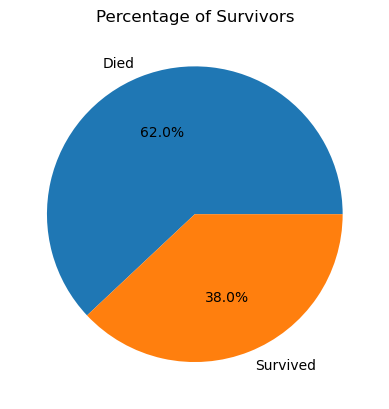

In [128]:

# Data for the pie chart
df_survived_relative = df['Survived'].value_counts(dropna=False, normalize=True) *100
df_survived_relative = df_survived_relative.round()
#labels = list(df_survived_relative.index)
values = list(df_survived_relative)

# Create the pie chart
plt.pie(values, labels=["Died", "Survived"], autopct='%1.1f%%')

# Add a title
plt.title('Percentage of Survivors')

# Display the chart
plt.show()

Dall'analisi dei sopravvissuti emerge che la maggior parte non ce l'ha fatta.

Ma entriamo nel dettaglio di quanti maschi e femmine effettivamente hanno perso la vita

---

## 5. Sex (Gender)

In [129]:
#Survivors aggregated by gender e 
gender_survived = df.groupby(by=['Sex', 'Survived'])['Survived'].count()

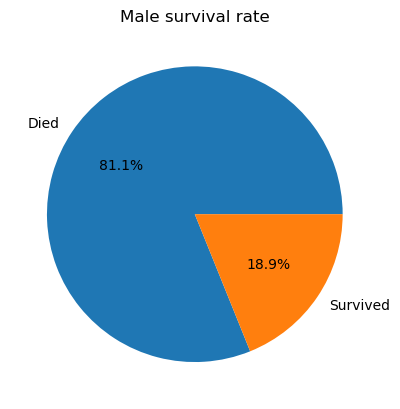

In [130]:
#Male survivors in a pie chart
male_survived = gender_survived.get('male')
plt.title("Male survival rate")
plt.pie(male_survived, labels=["Died", "Survived"], autopct='%1.1f%%')
plt.show()

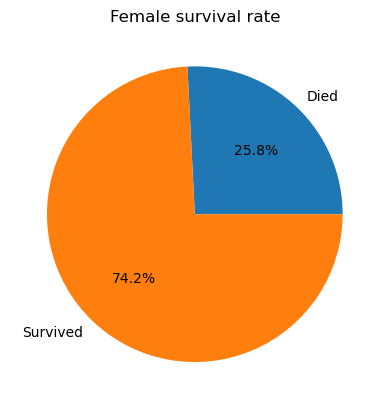

In [131]:
#female survivors in a pie chart
female_survived = gender_survived.get('female')
plt.title("Female survival rate")
plt.pie(female_survived, labels=["Died", "Survived"], autopct='%1.1f%%')
plt.show()

Ok in sostanza possiamo notare come la maggior parte dei maschi non sia sopravvissuta mentre la maggior parte delle femmine invece ce l'abbia fatta.

Analizziamo un altro tipo di variabile.

---

## 6. Pclass (Ticket Class)


### Analisi Classe di appartenza, dalla Prima Classe in giù (variabile categorica).

In [132]:
class_survived = df.groupby(by=['Pclass', 'Survived'])['Survived'].count()

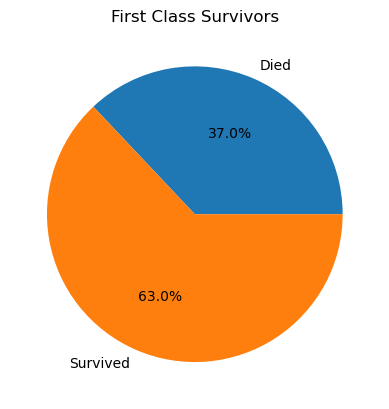

In [133]:
first_class = class_survived.get(1)
plt.title("First Class Survivors")
plt.pie(first_class, labels=["Died", "Survived"], autopct='%1.1f%%')
plt.show()

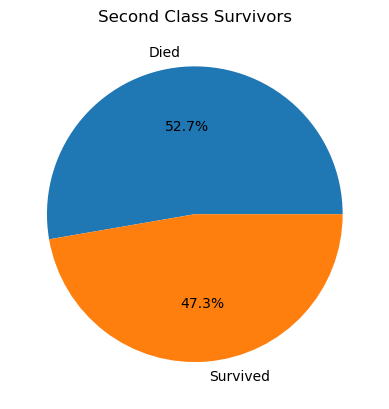

In [134]:
second_class = class_survived.get(2)
plt.title("Second Class Survivors")
plt.pie(second_class, labels=["Died", "Survived"], autopct='%1.1f%%')
plt.show()

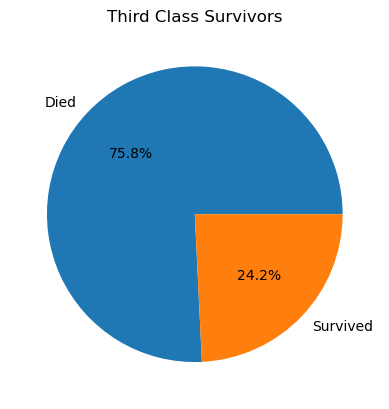

In [135]:
third_class = class_survived.get(3)
plt.title("Third Class Survivors")
plt.pie(third_class, labels=["Died", "Survived"], autopct='%1.1f%%')
plt.show()

Apparently, from what we can see, most of the first class survived while most of the third class died.

But does the class also influenced gender survival?

---

## 7. Relationship between Sex and Pclass

In [136]:
class_gender_survived = df.groupby(by=['Pclass', 'Survived', 'Sex'])['Survived'].count()
class_gender_survived

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
Name: Survived, dtype: int64